<img src=".\images\Logo.png" width=150 align="left" /> <img src=".\images\Logo2.jpg" width=450 align="right" />


# <center><font color= #1e8449 > <b>CUxx_Nombre del caso de uso</font></center>

<font color='steelblue'><b>Citizenlab Data Science Methodology > II - Data Processing Domain </font>
***
> # <font color='steelblue'> <b>09.3.- Data Cleansing - Outliers</font>

<font color='steelblue'>Data Cleaning refers to identifying and correcting (or removing) errors in the dataset that may negatively impact a predictive model, replacing, modifying, or deleting the dirty or coarse data.</font>

## <font color='steelblue'>Tasks</font>

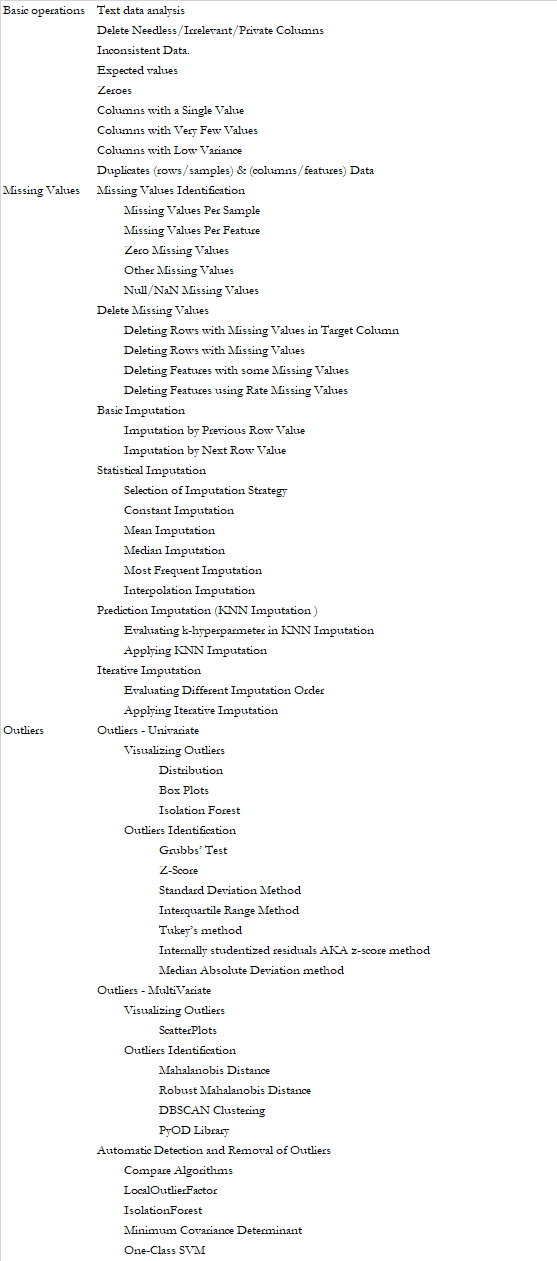


## <font color='green'>File</font>

- <font color='steelblue'> <b>Input File: xxxxxxxxxx</font>
- <font color='steelblue'> <b>Output File: xxxxxxxxxx</font>

## <font color='green'>Settings</font>

In [1]:
# Libraries to use
import os
from pathlib import Path
import pandas as pd
import easygui as GUI
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


## <font color='green'>Data Load</font>

<font color='tomato'><b> OPCION A:</b> Uso de la librería "easygui" para mayor comodidad</font>

In [2]:
# Data load using "easygui" library
file_data=GUI.fileopenbox(title='Open Data File', default="Data/Input/", filetypes="*.*")

<font color='tomato'>Utilizamos en todos los notebooks SIEMPRE <b>data</b> como nombre de la matriz (dataframe) principal donde cargamos los datos.</font>

In [2]:
# Data file to dataframe
data = pd.read_csv(file_data)

NameError: name 'pd' is not defined

In [3]:
data.head()

NameError: name 'data' is not defined

<font color='tomato'><b> OPCION B:</b> Directamente</font>

In [2]:
file_name='diabetes.csv'
data = pd.read_csv('Data/Input/'+file_name)

<font color='tomato'>Visualizo los datos.</font>

In [1]:
data

NameError: name 'data' is not defined

## Outliers - Univariate

### Visualizing Outliers

#### Distribution

<font color='tomato'>Selecting feature to analyze</font>

In [3]:
# Selecting feature to analyze
feature=data['Age (years)']

<font color='darkgrey'><b>Operation</font>

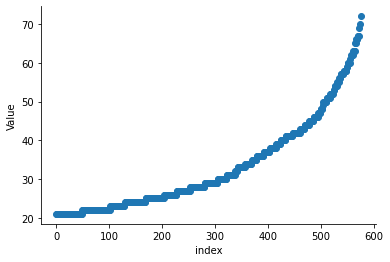

In [4]:
plt.scatter(range(feature.shape[0]), np.sort(feature.values))
plt.xlabel('index')
plt.ylabel('Value')
sns.despine()

C:\Users\Eugenio\Anaconda3\envs\kapreolus\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


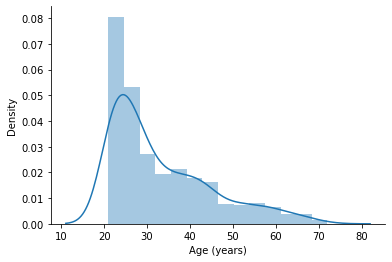

In [5]:
feat=feature.values
sns.distplot(feature)
sns.despine()

In [64]:
print("Skewness: %f" % feature.skew())
print("Kurtosis: %f" % feature.kurt())

Skewness: 1.129597
Kurtosis: 0.643159


#### Box Plots
Are great to summarize and visualize the distribution of variables easily and quickly.

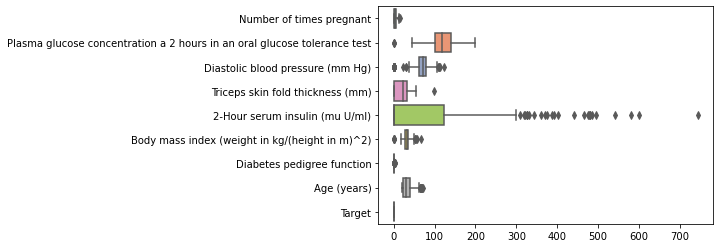

In [6]:
# Analyze all data
import seaborn as sns
ax = sns.boxplot(data=data, orient="h", palette="Set2")

<font color='tomato'>Selecting feature to analyze</font>

In [65]:
# Selecting feature to analyze
feature=data['Age']

<font color='darkgrey'><b>Operation</font>

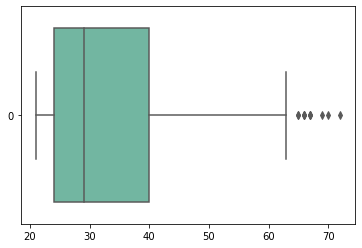

In [7]:
# Analyze specifics features
import seaborn as sns
ax = sns.boxplot(data=feature, orient="h", palette="Set2")

#### Isolation Forest

<font color='tomato'>Selecting feature to analyze</font>

In [65]:
# Selecting feature to analyze
feature=data['Age']

<font color='darkgrey'><b>Operation</font>

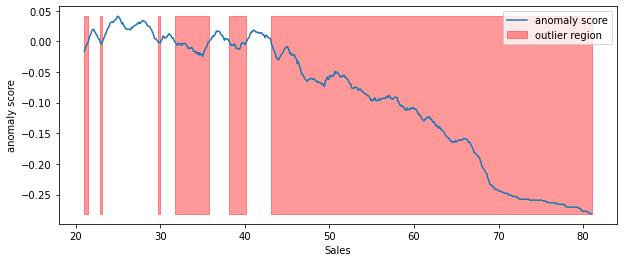

In [68]:
from sklearn.ensemble import IsolationForest
isolation_forest = IsolationForest(n_estimators=100)
isolation_forest.fit(feature.values.reshape(-1, 1))
xx = np.linspace(feature.min(), feature.max(), len(data)).reshape(-1,1)
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)
plt.figure(figsize=(10,4))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), 
                 where=outlier==-1, color='r', 
                 alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('Feature')
plt.show();

### Outliers Identification

#### Grubbs’ Test

<font color='tomato'>Selecting feature to analyze</font>

In [39]:
# Selecting feature to analyze
X=data['Age']

<font color='darkgrey'><b>Operation</font>

#### Z-Score

<font color='tomato'>Selecting feature to analyze</font>

In [39]:
# Selecting feature to analyze
X=data['Age']

<font color='darkgrey'><b>Operation</font>

In [40]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(X))
print(z)

[1.4259954  0.19067191 0.10558415 1.04154944 0.0204964  0.27575966
 0.61611067 0.36084741 1.68125866 1.76634642 0.27575966 0.06459135
 2.02160968 2.19178518 1.51108316 0.10558415 0.19067191 0.19067191
 0.0204964  0.10558415 0.53102292 1.4259954  0.66020563 0.36084741
 1.51108316 0.66020563 0.83038113 0.95646168 2.02160968 0.40494237
 2.27687294 0.44593516 0.95646168 0.44593516 1.00055664 0.0204964
 0.14967911 1.08564439 0.53102292 1.93652192 0.61611067 0.31985461
 1.2558199  1.76634642 0.57511787 0.70119842 0.36084741 0.95646168
 0.19067191 0.78628618 0.95646168 0.61611067 0.27575966 2.10669743
 0.74529338 1.04154944 0.66020563 0.19067191 0.91546889 0.95646168
 1.04154944 0.49003012 0.23476686 0.78628618 0.74529338 0.10558415
 0.40494237 1.76634642 0.70119842 0.53102292 0.44593516 0.61611067
 0.74529338 0.87137393 0.95646168 0.95646168 0.66020563 0.53102292
 0.61611067 0.78628618 0.95646168 0.95646168 0.23476686 0.95646168
 0.31985461 0.53102292 1.00055664 0.61611067 0.83038113 0.78628

In [41]:
# Define a threshold to identify an outlier.
# List of row numbers with outlier 
threshold = 3
pd.DataFrame(np.where(z > 3))

,0,1,2,3,4
0,123,453,459,666,684


<font color='tomato'>Selecting feature to analyze</font>

In [42]:
# Selecting all features to analyze
X=data

<font color='darkgrey'><b>Operation</font>

In [43]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(X))
print(z)

[[0.63994726 0.84832379 0.14964075 ... 0.46849198 1.4259954  1.36589591]
 [0.84488505 1.12339636 0.16054575 ... 0.36506078 0.19067191 0.73212021]
 [1.23388019 1.94372388 0.26394125 ... 0.60439732 0.10558415 1.36589591]
 ...
 [0.3429808  0.00330087 0.14964075 ... 0.68519336 0.27575966 0.73212021]
 [0.84488505 0.1597866  0.47073225 ... 0.37110101 1.17073215 1.36589591]
 [0.84488505 0.8730192  0.04624525 ... 0.47378505 0.87137393 0.73212021]]


In [44]:
# Define a threshold to identify an outlier.
# The first row contains the list of row numbers 
# and second array respective column numbers
threshold = 3
pd.DataFrame(np.where(z > 3))

,0,1,2,3,4,5,6,7,8,9,...,83,84,85,86,87,88,89,90,91,92
0,4,7,8,9,13,15,45,49,49,58,...,666,673,684,684,695,697,703,706,706,753
1,6,2,4,5,4,2,6,2,5,6,...,7,5,5,7,4,2,2,2,5,4


#### Standard Deviation Method

<font color='tomato'>Selecting num of std</font>

In [25]:
# Selecting num of std
num_std=4

<font color='darkgrey'><b>Operation</font>

In [34]:
# identify outliers with standard deviation
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import std
# seed the random number generator
seed(1)
print('Identified outliers with std = %d' % num_std)
print('=================================')
for i in data.columns:
    # calculate summary statistics
    data_mean, data_std = mean(data[i]), std(data[i])
    # define outliers
    cut_off = data_std * num_std
    lower, upper = data_mean - cut_off, data_mean + cut_off
    # identify outliers
    outliers = [x for x in data[i] if x < lower or x > upper]
    print('%s (%d)' % (i, len(outliers)))

Identified outliers with std = 4
NPregnant (0)
Plasma (0)
Diastolic (0)
Triceps (1)
Serum (7)
Body (12)
Pedigree (5)
Age (1)
Target (0)


#### Interquartile Range Method

<font color='tomato'>Selecting factor k</font>

In [46]:
# Selecting factor k
k=1.5

<font color='darkgrey'><b>Operation</font>

In [47]:
# identify outliers with standard deviation
from numpy.random import seed
from numpy.random import randn
from numpy import percentile
# seed the random number generator
seed(1)
print('Identified outliers with k factor = %f' % k)
print('======================================')
# calculate interquartile range
q25, q75 = percentile(data, 25), percentile(data, 75)
iqr = q75 - q25
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))
# calculate the outlier cutoff
cut_off = iqr * k
lower, upper = q25 - cut_off, q75 + cut_off
for i in data.columns:
    # identify outliers
    outliers = [x for x in data[i] if x < lower or x > upper]
    print('%s (%d)' % (i, len(outliers)))

Identified outliers with k factor = 0.500000
Percentiles: 25th=0.462, 75th=61.000, IQR=60.538
NPregnant (0)
Plasma (644)
Diastolic (38)
Triceps (1)
Serum (266)
Body (0)
Pedigree (0)
Age (0)
Target (0)


#### Tukey’s method

In [82]:
#Tukey's method
def tukeys_method(df, variable):
    #Takes two parameters: dataframe & variable of interest as string
    q1 = df[variable].quantile(0.25)
    q3 = df[variable].quantile(0.75)
    iqr = q3-q1
    inner_fence = 1.5*iqr
    outer_fence = 3*iqr
    #inner fence lower and upper end
    inner_fence_le = q1-inner_fence
    inner_fence_ue = q3+inner_fence
    #outer fence lower and upper end
    outer_fence_le = q1-outer_fence
    outer_fence_ue = q3+outer_fence
    outliers_prob = []
    outliers_poss = []
    for index, x in enumerate(df[variable]):
        if x <= outer_fence_le or x >= outer_fence_ue:
            outliers_prob.append(index)
    for index, x in enumerate(df[variable]):
        if x <= inner_fence_le or x >= inner_fence_ue:
            outliers_poss.append(index)
    return outliers_prob, outliers_poss
for i in data.columns:
    probable_outliers_tm, possible_outliers_tm = tukeys_method(data, i)
    print("Feature: %s" % i)
    print("=====================")
    print("- Possible outliers")
    print(possible_outliers_tm)
    print("- Probable outliers")
    print(probable_outliers_tm)

Feature: NPregnant
- Possible outliers
[68, 252, 391]
- Probable outliers
[]
Feature: Plasma
- Possible outliers
[16, 154, 306, 342, 426, 483, 581]
- Probable outliers
[]
Feature: Diastolic
- Possible outliers
[9, 12, 65, 143, 173, 185, 218, 225, 296, 315, 322, 330, 369, 378, 401, 458, 460, 515, 517, 532, 555, 569, 601]
- Probable outliers
[9, 143, 185, 218, 225, 296, 369, 401, 458, 460, 517, 532, 555, 601]
Feature: Triceps
- Possible outliers
[]
- Probable outliers
[]
Feature: Serum
- Possible outliers
[42, 44, 113, 166, 193, 208, 250, 307, 335, 353, 413, 496, 557, 599, 609, 612]
- Probable outliers
[599]
Feature: Body
- Possible outliers
[65, 79, 127, 256, 587, 646]
- Probable outliers
[]
Feature: Pedigree
- Possible outliers
[80, 105, 120, 125, 155, 183, 205, 226, 247, 261, 267, 282, 326, 338, 373, 422, 459, 510, 531, 534, 568, 570, 650]
- Probable outliers
[510, 534]
Feature: Age
- Possible outliers
[23, 73, 93, 121, 186, 220, 308, 309, 408, 412, 423, 436, 474, 503, 580]
- Probable

#### Internally studentized residuals AKA z-score method

In [84]:
#Internally studentized method (z-score)
from scipy import stats
def z_score_method(df, variable_name):
    #Takes two parameters: dataframe & variable of interest as string
    columns = df.columns
    z = np.abs(stats.zscore(df))
    threshold = 3
    outlier = []
    index=0
    for item in range(len(columns)):
        if columns[item] == variable_name:
            index = item
    for i, v in enumerate(z[:, index]):
        if v > threshold:
            outlier.append(i)
        else:
            continue
    return outlier
for i in data.columns:
    outlier_z = z_score_method(data, i)
    print("Feature: %s" % i)
    print("=====================")
    print("- Outliers")
    print(outlier_z)

Feature: NPregnant
- Possible outliers
[68, 252, 391]
Feature: Plasma
- Possible outliers
[]
Feature: Diastolic
- Possible outliers
[9, 143, 185, 218, 225, 296, 369, 401, 458, 460, 517, 532, 555, 601]
Feature: Triceps
- Possible outliers
[]
Feature: Serum
- Possible outliers
[42, 193, 208, 250, 335, 557, 599, 609, 612]
Feature: Body
- Possible outliers
[256]
Feature: Pedigree
- Possible outliers
[120, 155, 205, 261, 282, 338, 510, 531, 534, 570]
Feature: Age
- Possible outliers
[121, 309, 423, 436, 474, 580]
Feature: Target
- Possible outliers
[]


#### Median Absolute Deviation method

In [85]:
#MAD method
def mad_method(df, variable_name):
    #Takes two parameters: dataframe & variable of interest as string
    columns = df.columns
    med = np.median(df, axis = 0)
    mad = np.abs(stats.median_absolute_deviation(df))
    threshold = 3
    outlier = []
    index=0
    for item in range(len(columns)):
        if columns[item] == variable_name:
            index == item
    for i, v in enumerate(df.loc[:,variable_name]):
        t = (v-med[item])/mad[item]
        if t > threshold:
            outlier.append(i)
        else:
            continue
    return outlier
for i in data.columns:
    outlier_mad = mad_method(data, i)
    print("Feature: %s" % i)
    print("=====================")
    print("- Outliers")
    print(outlier_mad)

Feature: NPregnant
- Outliers
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 46, 47, 48, 49, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 83, 84, 85, 86, 87, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 101, 102, 103, 104, 105, 106, 107, 108, 109, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 134, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 168, 170, 171, 172, 173, 174, 175, 176, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 190, 192, 193, 194, 195, 196, 197, 198, 200, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 225, 226, 227, 228, 229, 230, 231, 232, 234, 235, 237, 238, 239

C:\Users\Eugenio\Anaconda3\envs\datascience\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: `median_absolute_deviation` is deprecated, use `median_abs_deviation` instead!

To preserve the existing default behavior, use
`scipy.stats.median_abs_deviation(..., scale=1/1.4826)`.
The value 1.4826 is not numerically precise for scaling
with a normal distribution. For a numerically precise value, use
`scipy.stats.median_abs_deviation(..., scale='normal')`.

  
C:\Users\Eugenio\Anaconda3\envs\datascience\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in double_scalars
  
C:\Users\Eugenio\Anaconda3\envs\datascience\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  


## Outliers - MultiVariate

### Visualizing Outliers
ScatterPlots: a common way to plot multivariate outliers is the scatter plot.

#### ScatterPlots
A common way to plot multivariate outliers is the scatter plot.

In [5]:
data.head()

,NPregnant,Plasma,Diastolic,Triceps,Serum,Body,Pedigree,Age,Target
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<font color='tomato'>Selecting feature to analyze</font>

In [143]:
# Selecting feature to analyze
X1=data.loc[:, ['Diastolic', 'Age']]

<font color='darkgrey'><b>Operation</font>

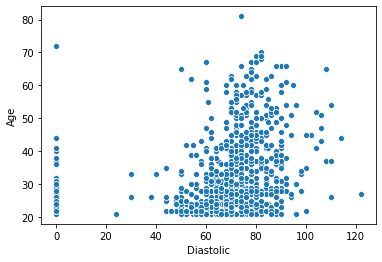

In [145]:
import seaborn as sns
ax = sns.scatterplot(x=X1.columns[0], y=X1.columns[1], data=X1)

### Outliers Identification

#### Mahalanobis Distance

In [21]:
#Mahalonibis Distance
import scipy as sp
from scipy.stats import chi2
from sklearn.covariance import MinCovDet
def mahalanobis_method(df):
    #M-Distance
    x_minus_mu = df - np.mean(df)
    cov = np.cov(df.values.T)                           #Covariance
    inv_covmat = sp.linalg.inv(cov)                     #Inverse covariance
    left_term = np.dot(x_minus_mu, inv_covmat) 
    mahal = np.dot(left_term, x_minus_mu.T)
    md = np.sqrt(mahal.diagonal())
    #Flag as outlier
    outlier = []
    #Cut-off point
    C = np.sqrt(chi2.ppf((1-0.001), df=df.shape[1]))    #degrees of freedom = number of variables
    for index, value in enumerate(md):
        if value > C:
            outlier.append(index)
        else:
            continue
    return outlier, md

<font color='tomato'>Selecting feature to analyze</font>

In [22]:
# Selecting features to analyze
feat=data.loc[:, ['Diastolic', 'Age']]

<font color='darkgrey'><b>Operation</font>

In [23]:
# Analyze selected features
outliers_mahal_bi, md_bi = mahalanobis_method(df=feat)
outliers_mahal_bi

[193, 222, 332, 336, 357, 453, 459, 468, 604, 703]

In [24]:
# Analyze all dataset
outliers_mahal_bi, md_bi = mahalanobis_method(df=data)
outliers_mahal_bi

[4,
 8,
 9,
 13,
 45,
 58,
 193,
 228,
 247,
 332,
 349,
 357,
 370,
 371,
 445,
 453,
 502,
 537,
 579,
 584,
 684,
 706]

#### Robust Mahalanobis Distance

In [28]:
#Robust Mahalonibis Distance
import scipy as sp
from scipy.stats import chi2
from sklearn.covariance import MinCovDet
def robust_mahalanobis_method(df):
    #Minimum covariance determinant
    rng = np.random.RandomState(0)
    real_cov = np.cov(df.values.T)
    X = rng.multivariate_normal(mean=np.mean(df, axis=0), cov=real_cov, size=506)
    cov = MinCovDet(random_state=0).fit(X)
    mcd = cov.covariance_ #robust covariance metric
    robust_mean = cov.location_  #robust mean
    inv_covmat = sp.linalg.inv(mcd) #inverse covariance metric
    #Robust M-Distance
    x_minus_mu = df - robust_mean
    left_term = np.dot(x_minus_mu, inv_covmat)
    mahal = np.dot(left_term, x_minus_mu.T)
    md = np.sqrt(mahal.diagonal())
    #Flag as outlier
    outlier = []
    C = np.sqrt(chi2.ppf((1-0.001), df=df.shape[1]))#degrees of freedom = number of variables
    for index, value in enumerate(md):
        if value > C:
            outlier.append(index)
        else:
            continue
    return outlier, md

<font color='tomato'>Selecting feature to analyze</font>

In [26]:
# Selecting features to analyze
feat=data.loc[:, ['Diastolic', 'Age']]

<font color='darkgrey'><b>Operation</font>

In [29]:
# Analyze selected features
outliers_mahal_rob_bi, md_rb_bi = robust_mahalanobis_method(df=feat)
outliers_mahal_bi

[4,
 8,
 9,
 13,
 45,
 58,
 193,
 228,
 247,
 332,
 349,
 357,
 370,
 371,
 445,
 453,
 502,
 537,
 579,
 584,
 684,
 706]

In [30]:
# Analyze all dataset
outliers_mahal_rob_bi, md_rb_bi = robust_mahalanobis_method(df=data)
outliers_mahal_bi

[4,
 8,
 9,
 13,
 45,
 58,
 193,
 228,
 247,
 332,
 349,
 357,
 370,
 371,
 445,
 453,
 502,
 537,
 579,
 584,
 684,
 706]

#### DBSCAN Clustering

<font color='tomato'>Selecting feature to analyze</font>

In [6]:
# Selecting feature to analyze
X1=data.loc[:, ['Diastolic', 'Age']]

<font color='darkgrey'><b>Operation</font>

In [7]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
# Scale data
X2 = StandardScaler().fit_transform(X1)
X=pd.DataFrame(X2)

In [8]:
# specify & fit model
model = DBSCAN(eps = 0.3, min_samples = 10).fit(X)
core_samples_mask = np.zeros_like(model.labels_, dtype=bool)
core_samples_mask[model.core_sample_indices_] = True
labels = model.labels_
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 2
Estimated number of noise points: 68


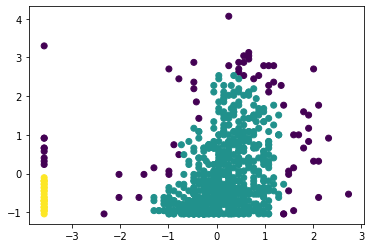

In [9]:
# visualize outputs
colors = model.labels_
plt.scatter(X[0], X[1], c = colors)

In [10]:
# outliers dataframe
outliers = X[model.labels_ == -1]
out=pd.DataFrame(outliers)
out

,0,1
4,-1.504687,-0.020496
9,1.390387,1.766346
13,-0.470732,2.191785
18,-2.021665,-0.020496
43,2.114155,1.766346
...,...,...
691,2.320946,0.915469
703,-3.572597,0.660206
715,-0.987710,0.064591
749,-0.367337,1.425995


In [11]:
# Index of rows with outliers
out.index

Int64Index([  4,   9,  13,  18,  43,  53,  84, 102, 106, 114, 115, 123, 125,
            129, 148, 177, 187, 193, 207, 212, 221, 222, 223, 243, 250, 263,
            294, 303, 332, 336, 357, 362, 363, 369, 379, 387, 401, 440, 453,
            456, 459, 464, 468, 479, 489, 495, 509, 519, 537, 549, 552, 571,
            576, 597, 599, 604, 658, 662, 666, 672, 673, 674, 684, 691, 703,
            715, 749, 759],
           dtype='int64')

In [12]:
# Outliers Dataframe
OD=pd.DataFrame(columns=X1.columns)
for i,j in enumerate(out.index):
    OD=pd.concat([OD, X1.iloc[j:j+1]])
OD

,Diastolic,Age
4,40,33
9,96,54
13,60,59
18,30,33
43,110,54
...,...,...
691,114,44
703,0,41
715,50,34
749,62,50


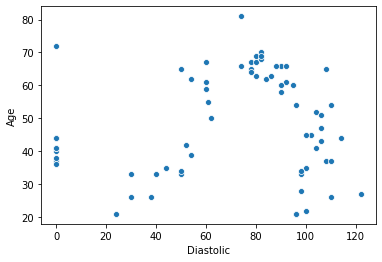

In [13]:
import seaborn as sns
ax = sns.scatterplot(x=OD.columns[0], y=OD.columns[1], data=OD)

#### PyOD Library

- https://www.analyticsvidhya.com/blog/2019/02/outlier-detection-python-pyod/
- https://github.com/yzhao062/pyod#quick-start-for-outlier-detection
- https://towardsdatascience.com/anomaly-detection-for-dummies-15f148e559c1

## Automatic Detection and Removal of Outliers

### Compare Algorithms

Adapt teh next example to real data

https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_anomaly_comparison.html

### LocalOutlierFactor

In [49]:
from sklearn.neighbors import LocalOutlierFactor
# split into input and output elements
data_numpy= data.values
ix = [i for i in range(data_numpy.shape[1]) if i != target_index]
X, y = data_numpy[:, ix], data_numpy[:, target_index]
# identify outliers 
lof = LocalOutlierFactor()
yhat = lof.fit_predict(X)
# select all rows that are not outliers
mask = yhat != -1
X, y = X[mask, :], y[mask]
# summarize the shape of the updated training dataset
print(X.shape, y.shape)

(747, 8) (747,)


In [53]:
# Generating the new Data dataframe without outliers
X_col_names = [i for i in data.columns if i != target]
X1=pd.DataFrame(X)
y1=pd.DataFrame(y)
X1.columns=X_col_names
y1.columns=[target]
data=pd.concat([X1,y1], axis=1)
data

,NPregnant,Plasma,Diastolic,Triceps,Serum,Body,Pedigree,Age,Target
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0
...,...,...,...,...,...,...,...,...,...
742,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0,0.0
743,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0,0.0
744,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0.0
745,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0,1.0


### IsolationForest

In [56]:
from sklearn.ensemble import IsolationForest
# split into input and output elements
data_numpy= data.values
ix = [i for i in range(data_numpy.shape[1]) if i != target_index]
X, y = data_numpy[:, ix], data_numpy[:, target_index]
# identify outliers 
iso = IsolationForest(contamination=0.1)
yhat = iso.fit_predict(X)
# select all rows that are not outliers
mask = yhat != -1
X, y = X[mask, :], y[mask]
# summarize the shape of the updated training dataset
print(X.shape, y.shape)

(672, 8) (672,)


In [57]:
# Generating the new Data dataframe without outliers
X_col_names = [i for i in data.columns if i != target]
X1=pd.DataFrame(X)
y1=pd.DataFrame(y)
X1.columns=X_col_names
y1.columns=[target]
data=pd.concat([X1,y1], axis=1)
data

,NPregnant,Plasma,Diastolic,Triceps,Serum,Body,Pedigree,Age,Target
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,5.0,116.0,74.0,0.0,0.0,25.6,0.201,30.0,0.0
...,...,...,...,...,...,...,...,...,...
667,9.0,89.0,62.0,0.0,0.0,22.5,0.142,33.0,0.0
668,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0,0.0
669,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0.0
670,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0,1.0


### Minimum Covariance Determinant

In [59]:
from sklearn.covariance import EllipticEnvelope
# split into input and output elements
data_numpy= data.values
ix = [i for i in range(data_numpy.shape[1]) if i != target_index]
X, y = data_numpy[:, ix], data_numpy[:, target_index]
# identify outliers 
ee = EllipticEnvelope(contamination=0.01)
yhat = ee.fit_predict(X)
# select all rows that are not outliers
mask = yhat != -1
X, y = X[mask, :], y[mask]
# summarize the shape of the updated training dataset
print(X.shape, y.shape)

(665, 8) (665,)


In [60]:
# Generating the new Data dataframe without outliers
X_col_names = [i for i in data.columns if i != target]
X1=pd.DataFrame(X)
y1=pd.DataFrame(y)
X1.columns=X_col_names
y1.columns=[target]
data=pd.concat([X1,y1], axis=1)
data

,NPregnant,Plasma,Diastolic,Triceps,Serum,Body,Pedigree,Age,Target
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,5.0,116.0,74.0,0.0,0.0,25.6,0.201,30.0,0.0
...,...,...,...,...,...,...,...,...,...
660,9.0,89.0,62.0,0.0,0.0,22.5,0.142,33.0,0.0
661,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0,0.0
662,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0.0
663,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0,1.0


### One-Class SVM

In [61]:
from sklearn.svm import OneClassSVM
# split into input and output elements
data_numpy= data.values
ix = [i for i in range(data_numpy.shape[1]) if i != target_index]
X, y = data_numpy[:, ix], data_numpy[:, target_index]
# identify outliers 
ee = OneClassSVM(nu=0.01)
yhat = ee.fit_predict(X)
# select all rows that are not outliers
mask = yhat != -1
X, y = X[mask, :], y[mask]
# summarize the shape of the updated training dataset
print(X.shape, y.shape)

(659, 8) (659,)


In [1]:
# Generating the new Data dataframe without outliers
X_col_names = [i for i in data.columns if i != target]
X1=pd.DataFrame(X)
y1=pd.DataFrame(y)
X1.columns=X_col_names
y1.columns=[target]
data=pd.concat([X1,y1], axis=1)
data

NameError: name 'data' is not defined

## <font color='green'>Data Save</font>

<font color='tomato'> Identificamos los datos a guardar</font>

In [7]:
data_to_save = data

<font color='tomato'>Extensión añadida al nombre del fichero: será el número del proceso que lo genera (e.g. diabetes_06).</font>

<font color='tomato'>En caso de generarse varios ficheros llevarán _01 _02 ... después (e.g. diabetes_06_01).</font>

In [8]:
# Proceso 09_3
extension='_09_3'

<font color='tomato'><b> OPCION A:</b> Uso de la librería "easygui" para mayor comodidad</font>

In [11]:
# Guardamos el fichero
file_save=basename(file_data).replace('.csv',extension+'.csv')
path_save="Data/Output/"+file_save
path_out=GUI.filesavebox(title='Save Data File',default=path_save)
data_to_save.to_csv(path_out, index=False)
print('Falie saved as:')
path_out

Falie saved as:


<font color='tomato'><b> OPCION B:</b> Uso del código que va a Pilot Deploy</font>

In [10]:
file_save=basename(file_name).replace('.csv',extension+'.csv')
data_to_save.to_csv('Data/Output/' + file_save, index=False)

## <font color='#2874a6'>REPORT</font>

A continuación se realizará un informe de las acciones realizadas

## <font color=' #2874a6 '>Main Actions Carried Out</font>

Ejemplos
- Se han modificado los nombres de las columnas
- Se han eliminado blancos en los nombres de las columnas
- Se han traducido los nombres de las columnas

## <font color=' #2874a6 '>Main Conclusions</font>

Ejemplos
- Los nombre de las columnas de origen son muy largos lo que provoca que ...
- ......

## <font color='RED'>CODE TO DEPLOY</font>

A continuación se incluirá el código que deba ser llevado a despliegue para producción, dado que se entiende efectúa operaciones necesarias sobre los datos en la ejecución del prototipo

<font color=' red '><b>Description</b></font>

- xxxxxx
- xxxxxx
- xxxxxx

<font color=' red '><b>CODE</b></font>

In [1]:
# 
